# Análisis Bivariado

• Relaciona dos variables entre sí (por ejemplo: Edad vs. Satisfacción)<br>
• Usa correlación para variables numéricas.  <br>
• Usa gráficos como scatterplots o boxplots por categoría. <br> <br> 
Pregúntate: ¿Existe relación entre esta variable y el objetivo? ¿Podría influir en el 
modelo?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas y tipos de datos para entender la estructura del dataset
pd.set_option('display.max_rows', 100)      # Show up to 100 rows
pd.set_option('display.max_columns', 20)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Relaciona dos variables entre sí (por ejemplo: Edad vs. Satisfacción)<br>

El par de variables numéricas más correlacionadas es: ('Curricular units 2nd sem (credited)', 'Curricular units 1st sem (credited)') con una correlación de 0.94


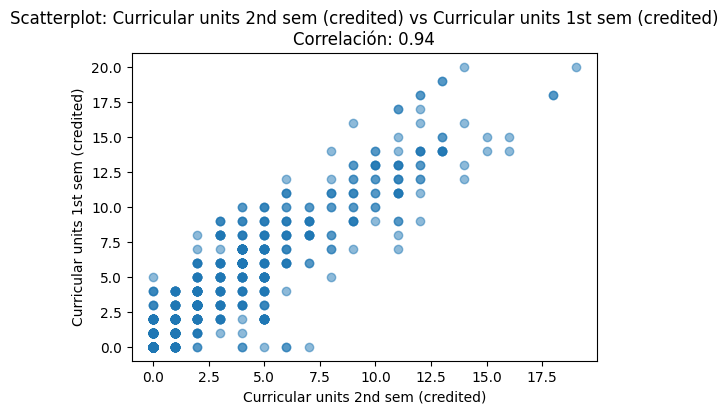

In [22]:
print(f"El par de variables numéricas más correlacionadas es: {best_pair} con una correlación de {best_corr_value:.2f}")

# Scatterplot for the most correlated pair
import matplotlib.pyplot as plt

x_var, y_var = best_pair
plt.figure(figsize=(6,4))
plt.scatter(df[x_var], df[y_var], alpha=0.5)
plt.xlabel(x_var)   
plt.ylabel(y_var)
plt.title(f'Scatterplot: {x_var} vs {y_var}\nCorrelación: {best_corr_value:.2f}')
plt.show()

## Usa correlación para variables numéricas.  <br>


In [16]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr_matrix = df[numerical_cols].corr().abs()

# Elimina la autocorrelación (la correlación de una variable consigo misma)
np.fill_diagonal(corr_matrix.values, 0)

# Define un umbral para considerar "alta" correlación
threshold = 0.7

# Encuentra todos los pares con correlación mayor al umbral
high_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
high_corr_pairs = high_corr[high_corr >= threshold]

print("Pares de variables numéricas con alta correlación (>|0.7|):")
for pair, value in high_corr_pairs.items():
    print(f"{pair}: {value:.2f}")

Pares de variables numéricas con alta correlación (>|0.7|):
('Curricular units 2nd sem (credited)', 'Curricular units 1st sem (credited)'): 0.94
('Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)'): 0.94
('Nacionality', 'International'): 0.91
('Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)'): 0.90
('Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'): 0.84
('Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (evaluations)'): 0.78
('Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)'): 0.77
('Curricular units 1st sem (approved)', 'Curricular units 1st sem (enrolled)'): 0.77
('Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)'): 0.76
('Curricular units 2nd sem (credited)', 'Curricular units 1st sem (enrolled)'): 0.75
('Curricular units 2nd sem (enrolled)', 'Curricular units 1st sem (approved)'): 0.73
("Father's occupation", "Mother's occupation"): 0.72
(

## Usa gráficos como scatterplots o boxplots por categoría.

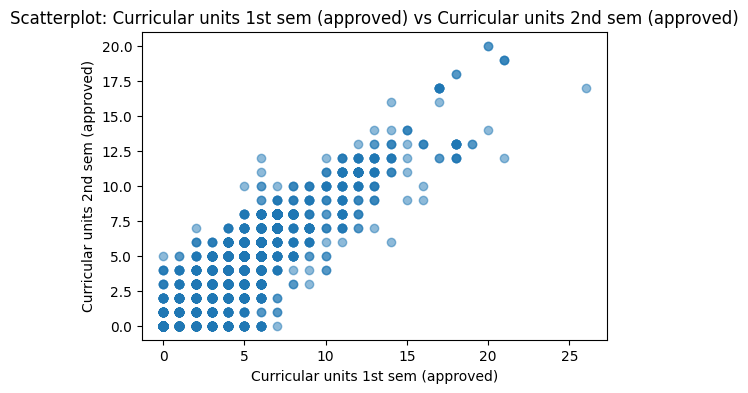

<Figure size 600x400 with 0 Axes>

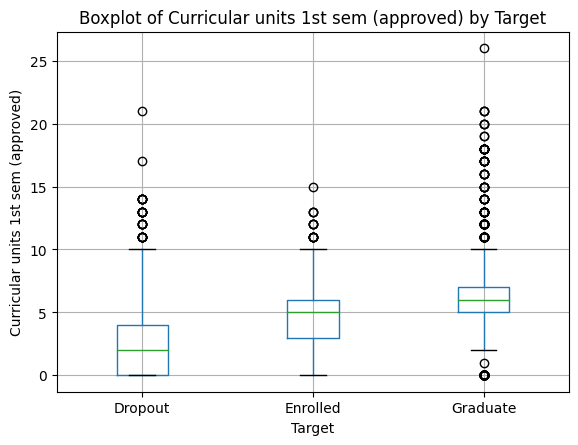

In [20]:
import matplotlib.pyplot as plt

# Scatterplot: Relación entre dos variables numéricas
x_var = "Curricular units 1st sem (approved)"
y_var = "Curricular units 2nd sem (approved)"

plt.figure(figsize=(6,4))
plt.scatter(df[x_var], df[y_var], alpha=0.5)
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title(f'Scatterplot: {x_var} vs {y_var}')
plt.show()

# Boxplot: Distribución de una variable numérrica por categoría
num_var = "Curricular units 1st sem (approved)"
cat_var = "Target" 

plt.figure(figsize=(6,4))
df.boxplot(column=num_var, by=cat_var)
plt.title(f'Boxplot of {num_var} by {cat_var}')
plt.suptitle('')
plt.xlabel(cat_var)
plt.ylabel(num_var)
plt.show()